In [1]:
#t-sne on mnist with vgg extracted features, lift from
#https://colab.research.google.com/github/tensorchiefs/dl_course_2018/blob/master/notebooks/15_unsupervised_features_solution.ipynb#scrollTo=4VFLeyuIonBh
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as imgplot
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from pylab import *
import tensorflow as tf
import keras
import sys
print ("Keras {} TF {} Python {}".format(keras.__version__, tf.__version__, sys.version_info))

Keras 2.4.3 TF 2.2.0 Python sys.version_info(major=3, minor=6, micro=8, releaselevel='final', serial=0)


In [2]:
#downlad mnist data
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
del [x_test,y_test]

In [3]:
#loop over each class label and sample 100 random images over each label and save the idx to subset
np.random.seed(seed=486)
idx=np.empty(0,dtype="int8")
for i in range(0,len(np.unique(y_train))):
    idx=np.append(idx,np.random.choice(np.where((y_train[0:len(y_train)])==i)[0],100,replace=False))

x_train= x_train[idx]
y_train= y_train[idx]

In [4]:
print(x_train.shape)
print(y_train.shape)
print(np.unique(y_train,return_counts=True))

(1000, 28, 28)
(1000,)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([100, 100, 100, 100, 100, 100, 100, 100, 100, 100]))


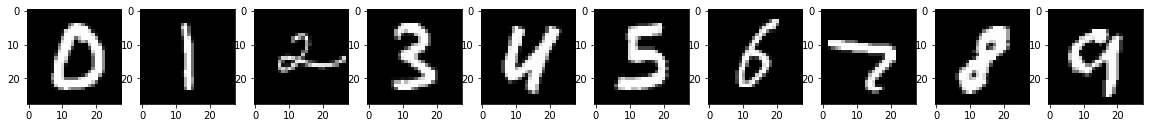

In [5]:
#sample image of each label
plt.figure(figsize=(20,20))
for i in range(0,len(np.unique(y_train))):
    rmd=np.random.choice(np.where(y_train==i)[0],1)
    plt.subplot(1,10,i+1)
    img=x_train[rmd].reshape(1,28,28,1)
    plt.imshow(img[0,:,:,0],cmap="gray")

In [6]:
# takes some time
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
tsne = model.fit_transform(x_train.reshape((len(x_train),28*28)))

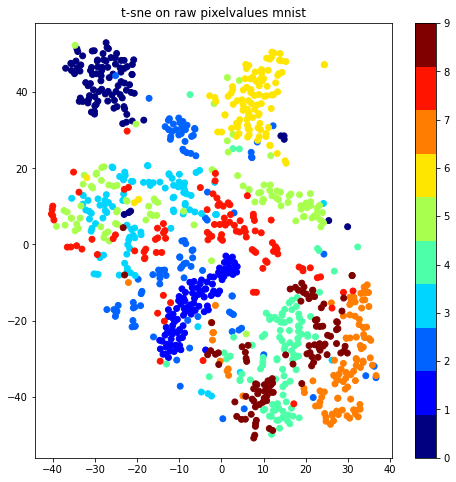

In [7]:
plt.figure(figsize=(8,8))
cmap = cm.get_cmap('jet', 10)
plt.scatter(x=tsne[:,0],y=tsne[:,1],c=y_train,s=35,cmap=cmap)
plt.title("t-sne on raw pixelvalues mnist")
plt.colorbar()
plt.show()

In [8]:
# Downloading embeddings which have been extracted beforehand
import urllib
import os
if not os.path.isfile('Mnist_EMB_1000.npz'):
    urllib.request.urlretrieve(
    "https://www.dropbox.com/s/ejiu7ymoyn6kxp7/Mnist_EMB_1000.npz?dl=1",
    "Mnist_EMB_1000.npz")
%ls -hl Mnist_EMB_1000.npz
Data=np.load("Mnist_EMB_1000.npz")
vgg_features_mnist = Data["arr_0"]

-rw-rw-r--. 1 gmartins gmartins 18M Jul 21 18:55 Mnist_EMB_1000.npz


In [9]:
model = TSNE(n_components=2, random_state=0)
tsne = model.fit_transform(vgg_features_mnist)

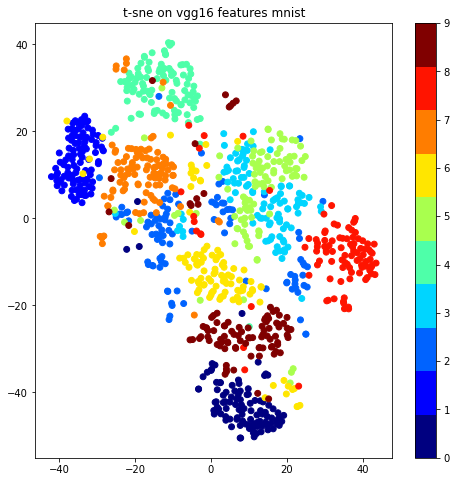

In [10]:
plt.figure(figsize=(8,8))
cmap = cm.get_cmap('jet', 10)
plt.scatter(x=tsne[:,0],y=tsne[:,1],c=y_train,s=35,cmap=cmap)
plt.title("t-sne on vgg16 features mnist")
plt.colorbar()
plt.show()